## Usefull Functions Template

In [26]:
# Importing basic functions
import pandas as pd
import missingno as mano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt 
import statistics as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro# Importing basic functions
import pandas as pd
import missingno as mano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt 
import statistics as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import matplotlib
from matplotlib.pyplot import figure
# Importinf Clasification Regression Related Functions
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn import metrics
import xgboost as xgb
# This function read data from excel and csv files to dataframe.
# Input Arguments file: File name with path (Eg: 'D:/data/dataread.csv'), f_type: File Type (Eg: 'csv',default csv)
def file_todataframe(file,f_type):
    if f_type == 'csv':  
        return pd.read_csv(file)
    elif f_type == 'excel': 
        return pd.read_excel(file)
    elif f_type == 'json': 
        return pd.read_json(file)
    
# This function display shape, data type, data near head and tail of given data fram.
# Input Arguments df: dataframe, n: No f data points to display
def df_details(d_f,n):
    print('Data Types of Column: \n',d_f.dtypes)
    print('\n Size of Datarame: ',d_f.shape)
    print('\n Top and bottom ',n,' rows: \n')
    display(d_f.head(n).append(d_f.tail(n)))

# This function drops irrelevant columns
# Input Arguments df: dataframe, col_del: Value or index array of column to delete (Eg: [1,3,5] or ['Names',Sales]), 
# typ: 1 for column index and 0 for column name in col_del
def col_drop(d_f,col_del,typ=0):
    if typ == 0:
        d_f = d_f.drop(col_del,axis=1)
    elif typ == 1:
        d_f = d_f.drop(df.columns[col_del],axis=1)
    return d_f

# This function drops rows with particular column values
# Input Arguments df: dataframe, row_del: Delete if row with given value,
# col_ref: Name of column to check for row values (Eg:['Names']), 
def row_drop(d_f,row_del,col_ref):
    d_f = d_f.drop(d_f[d_f[col_ref] == row_del].index)
    return d_f

# This function give deatials for missing values in data
# Input Arguments df: dataframe
def miss_ch(d_f):
    print('Available data with no nulls: ', d_f.dropna().shape[0])
    display('Deatils of Null values column wise',d_f.isnull().sum())
    
# This function give deatials for missing values in data
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# graph: Types of graph to display. (Eg: ['bar','matrix','heatmap','dendrogram'],['all'] default 'all')
def miss_viz(d_f,col_int = 'all',graph = 'all'):
    import missingno as mano
    av_gp = ['bar','matrix','heatmap','dendrogram']
    col_nam = d_f.columns
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    if graph == 'all':
        graph = av_gp
    elif not all(i in av_gp for i in graph):
        print("Invalid Graph type, select 'bar','matrix','heatmap','dendrogram'")
        return
    
    for gp in graph:
        getattr(mano, gp)(d_f[col_int])

# This function fill missing values
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# metd: Types of graph to display. (Option: {0(float),‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, 'linear'} default None)
def fill_miss(d_f,col_int = 'all',metd = None):
    col_nam = d_f.columns
    av_method = ['backfill', 'bfill', 'pad', 'ffill', 'linear']
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    
    if metd == None:
        return d_f
    elif (type(metd) == int) | (type(metd) == float):
        print('yes')
        return d_f[col_int].fillna(metd)  
    elif metd == 'linear':
        return d_f[col_int].interpolate(method = 'linear') 
    elif  metd in av_method:
        return d_f[col_int].fillna(method = 'ffill')
    else:
        print("Invalid fill type")
        return d_f

# Function for Numerical Data Analysis
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# func: Types of graph and function. (Option: {'distplot','boxpot','scatterplot','describe','normality'} default all)
def data_num(d_f,col_int = 'all',func = 'all',scat = None):
    from scipy.stats import shapiro
    from statsmodels.graphics.gofplots import qqplot
    av_func = ['hist','boxplot','scatter','describe','normality']
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_nam = d_f.select_dtypes(include=numerics).columns
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    #Checking Parameter available function
    if func == 'all':
        func = av_func
    elif not all(i in av_gp for i in graph):
        print("Invalid Graph type, select 'distplot','boxpot','scatterplot','describe','normality'")
        return
    if scat is None:
        scat = df.columns[0]
    
    
    for fn in func:
        if fn == 'describe':
            display("Statictical Details",df[col_int].describe())
        else:
            for col in col_int:
                if fn == 'normality':
                    #qqplot(df[col])
                    print("Normality Test for: ",col)
                    stat, p = shapiro(df[col])
                    if p > 0.05:
                        print('Sample looks Gaussian. Statistics=%.3f, p=%.3f'% (stat, p))
                    else:
                        print('Sample does not look Gaussian. Statistics=%.3f, p=%.3f'% (stat, p))
                elif fn == 'scatter':
                    display(col)
                    plt.scatter(df[col],df[scat])  
                    plt.show()
                else:
                    display(col)
                    getattr(plt, fn)(df[col])   
                    plt.show()
                    
# Function for Categorical Data Analysis
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all')
def data_cat(d_f,col_int = 'all',bar = None):
    import matplotlib.pyplot as plt
    col_nam = d_f.select_dtypes(include=['object','category']).columns
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_num = d_f.select_dtypes(include=numerics).columns   
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 

    if not ((bar in col_num) | (bar is None)):
        print("Only numeric column for Bar")
        return 
    if not (bar is None):
        for col in col_int:
            plt.figure(figsize=(8,5))
            plt.bar(d_f[col], d_f[bar])
            plt.show()
        return
    for col in col_int:
        plt.suptitle(col)
        d_f[col].value_counts().plot(kind='bar')
        plt.show()

# Function for Canging column type
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# dtyp: New data types of coloumn default int
def col_dtype(d_f,col_int,dtyp = int):
    d_f = deep_copy(d_f)
    av_fun = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','int','float','str','category']
    col_nam = d_f.columns
    #Checking Parameter Column names
    if not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    #Checking Parameter available function
    if not dtyp in av_fun:
        print("Invalid data type")
        return d_f
    
    d_f[col_int] = d_f[col_int].astype(dtyp,errors='ignore')
    return d_f

# Function for Canging column type
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# opr: Operation to be performed on coloumn values, val = [old value, new value]
def col_opre(d_f,col_int,opr = None,val = None):
    col_nam = d_f.select_dtypes(include=['object']).columns
    av_opr = ['str_replace','rm_space','chg_value']
    
    #Checking Parameter Column names
    if not (col_int in col_nam):
        print("Invalid column name")
        return d_f

    if opr == 'str_replace':
        d_f[col_int] = d_f[col_int].str.replace(val[0], val[1])
        return d_f
    elif opr == 'rm_space':
        d_f[col_int] = d_f[col_int].str.replace(' ', '')
        return d_f
    elif opr == 'chg_value':
        d_f[col_int] = d_f[col_int].replace(val[0], val[1])
        return d_f
    else:
        print("Invalid Opeation")
        return d_f
    
# Function for Performing numerical operations to column values
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# opr: Operation to be performed on coloumn values, val: value to apply on column
def col_opre(d_f,col_int = 'all',opr = None,val = None):
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]
    col_num = d_f.select_dtypes(include=numerics).columns  


    if opr == 'add':
        d_f[col_int] = d_f[col_int]+val
        return d_f
    elif opr == 'sub':
        d_f[col_int] = d_f[col_int]-val
        return d_f
    elif opr == 'mul':
        d_f[col_int] = d_f[col_int]*val
        return d_f
    elif opr == 'div':
        d_f[col_int] = d_f[col_int]/val
        return d_f
    else:
        print("Invalid Opeation")
        return d_f

# Function for creating a deep copy
# Input Arguments df: dataframe, Output data frame copy
def deep_copy(d_f):
    return d_f.copy(deep=True)

# Function for coding Categorical variable  to Numeric
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'{must be string}), 
# coding_type: Coding type to apply{'label','binary','ordinal','onehot'} default,label, contain: For binary
def cat_num(d_f,col_int,coding_type = 'label',contain=None,X = None):
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
    d_f = deep_copy(d_f)
    col_nam = d_f.select_dtypes(include=['object']).columns
    if not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    else: 
        d_f[col_int] =  d_f[col_int].astype('str')
        
    if coding_type == 'label':
        for col in col_int:
            d_f[col] = d_f[col].astype('category')
            d_f[col] = d_f[col].cat.codes
        return d_f
    elif coding_type == 'binary':
        for col in col_int:
            d_f[col] = np.where(d_f[col].str.contains(contain), 1, 0)
        return d_f
    elif coding_type == 'ordinal':
        for col in col_int:
            ord_enc = OrdinalEncoder()
            d_f[col] = ord_enc.fit_transform(d_f[[col]])
        return d_f
    elif coding_type == 'onehot':
        for col in col_int:
            temp = pd.get_dummies(d_f[col], prefix=col)
            d_f = d_f.join(temp)
            d_f = col_drop(d_f,col)
        return d_f
    else:
        display("Invalid Ending Method")
        return d_f
    
# This function scatter Plot
# Input Arguments df: dataframe, col_int: Two columns of intrest (Eg: ['Sale','Customer'],['all']), 
def scatter_plot(d_f,col_int = None):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_nam = d_f.select_dtypes(include=numerics).columns
    if (col_int is None) & (not all(i in col_nam for i in col_int)) & (len(col_int) != 2):
        print("Invalid column name")
        return 
    x = d_f[col_int[0]]
    y = d_f[col_int[1]]
    xv = col_int[0]+' X- Value'
    yv = col_int[1]+' Y- Value'
    tit = col_int[0] + ' vs ' + col_int[1] +' Scatter plot'

    plt.scatter(x, y)
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(tit)
    plt.xlabel(xv)
    plt.ylabel(yv)
    plt.show()

# Function for applyng Machine learning Models
# Input Arguments df with last raw as labels, task: regression or classification, algo: Descion Tree or Random Forest
def anova(d_f,col_int='all',col_main=None):
    from scipy import stats
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]
    col_num = d_f.select_dtypes(include=numerics).columns 
    
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    for col in col_int:
        model = ols(col_main+'~ C(Q("'+col+'"))', data=d_f).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print ("\nAnova =>",col_main," - ",col)
        display(anova_table)

## T Test
def t_test(d_f,col_ind=[1,2]):
    data1 = d_f.iloc[:,col_ind[0]].values
    data2 = d_f.iloc[:,col_ind[1]].values
    # calculate means
    mean1, mean2 = st.mean(data1), st.mean(data2)
    # calculate sample standard deviations
    std1, std2 = st.stdev(data1), st.stdev(data2)
    # calculate standard errors
    n1, n2 = len(data1), len(data2)
    se1, se2 = std1/mt.sqrt(n1), std2/mt.sqrt(n2)
    # standard error on the difference between the samples
    sed = mt.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    print('T Test Statistics=%.3f' % (t_stat))

## Normality Test
def norm(d_f,col_ind=[1]):
    for col in col_ind:
        data = d_f.iloc[:,col]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        data.hist()
        
# This function Correlation Heat Map
# Input Arguments d_f: dataframe
def corr_hmap(d_f):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(15,8)})
    corr = d_f.corr().dropna(1,'all').dropna(0,'all')
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    );
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
        horizontalalignment='right'
    );    

# Function for applyng Machine learning Models
# Input Arguments df with last raw as labels, task: regression or classification, algo: Descion Tree or Random Forest
def ml_algo(X_train, X_test, y_train, y_test,algo = 'decisiontree',task = 'Reg',n=3):

    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    if task == 'Reg':
        if algo == 'decisiontree':
            model = DecisionTreeRegressor(max_depth=n)

        elif algo == 'randomforest':
            model = RandomForestRegressor(n_estimators = n, random_state = 42)
            
        elif algo == 'knn':
            model = KNeighborsRegressor(n_neighbors=n)
            
        elif algo == 'lreg':
            model = LinearRegression()
            
        elif algo == 'svm':
            model = SVR(kernel="rbf")
            
        elif algo == 'gboost':
            model = GradientBoostingRegressor()
            
        elif algo == 'adaboost':
            model = AdaBoostRegressor(random_state=0, n_estimators=100)
            
        else:
            print("Invalid Algorithm")
            return  
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r_2 = r2_score(y_test, y_pred)
        r_2adj = r2_score(y_test, y_pred,multioutput='variance_weighted')
        return mae,mse,r_2,r_2adj,model
        
    elif task == 'Class':    
        if algo == 'decisiontree':
            model = DecisionTreeClassifier(max_depth=n) 
        
        elif algo == 'randomforest':
            model=RandomForestClassifier(n_estimators=n)
            
        elif algo == 'knn':
            model = KNeighborsClassifier(n_neighbors=n)
            
        elif algo == 'gboost':
            model = GradientBoostingClassifier()
            
        elif algo == 'adaboost':
            model = AdaBoostClassifier(n_estimators=100, random_state=0)
            
        elif algo == 'svc':
            model = svm.SVC()
            
        elif algo == 'naive':
            model = GaussianNB()
            
        elif algo == 'xgboost':
            model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
            
        elif algo == 'mlp':
            model = MLPClassifier(hidden_layer_sizes=5)
            
        elif algo == 'logit':
            model = LogisticRegression()            
        else:
            print("Invalid Algorithm")
            return
        

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        c_m =confusion_matrix(y_test, y_pred)
        c_r = classification_report(y_test, y_pred)
        acc_sc = accuracy_score(y_test, y_pred)

        fpr , tpr, _ = roc_curve(y_test, y_pred)
        auc_roc = metrics.auc(fpr, tpr)
        
        logloss = log_loss(y_test, y_pred)       
        #Precision
        pre_l = precision_score(y_test, y_pred)*100
        #Recall
        recall_l = recall_score(y_test, y_pred)*100
        return c_m,c_r,acc_sc,auc_roc,logloss,model,pre_l,recall_l
    
# Data frame with output variable at first location
# f_s features to select
def feature_selectk(d_f,f_s,col):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    from sklearn.model_selection import train_test_split

    x = col_drop(d_f,col,typ=0)
    y = d_f[col]
    fs = SelectKBest(score_func=f_classif, k=f_s)
    # learn relationship from training data
    fs.fit(x, y)
    # transform train input data
    x_fs = fs.transform(x)
    return x_fs,y,fs

def feature_select_rffs(x,y,reg=True):
    from sklearn.feature_selection import SelectFromModel
    if reg:
        sel = SelectFromModel(RandomForestRegressor(n_estimators = 50))
    else:
        sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
    sel.fit(x, y)
    selected_feat= x.columns[(sel.get_support())]
    return selected_feat

def importantfeat_rffs(d_f,reg=True): 
    # random forest for feature importance on a regression problem
    from sklearn.datasets import make_regression
    from sklearn.ensemble import RandomForestRegressor
    from matplotlib import pyplot
    # define dataset
    X = d_f.iloc[:,1:len(d_f.columns)]
    y = d_f.iloc[:,:1]
    # define the model
    model = RandomForestRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.xticks(range(1,len(importance)),df.iloc[:,1:len(df)-1].columns,rotation=90)
    pyplot.show()
    
# kfoldtype = KFold , StratifiedKFold
def ml_algo_cv(X,y,algo = 'decisiontree',task = 'Reg',n=3,split=10,kftype ='skfold'):
    accf = 0
    aucf = 0
    pref = 0
    recallf = 0
    i= 0
    if kftype == 'skfold':
        kf = StratifiedKFold(n_splits=split, random_state=None, shuffle=False)
    elif kftype == 'kfold':
        kf = KFold(n_splits=split, random_state=None, shuffle=False)
        
    for train_index, test_index in kf.split(X,y):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        cm,cr,acc,auc,ll,mdl,pre,recall = ml_algo(trainX, testX, trainY, testY,algo = algo ,task = task,n=3)
        accf = accf + acc
        aucf = aucf + auc
        pref = pref + pre
        recallf = recallf + recall 
        i = i + 1
    accf = accf/i
    aucf = auc/i
    pref = pref/i
    recallf = recallf/i
    return accf,aucf,pref,recallf,cm

## Upsampling minority class and down sampling majority class 
def class_imbalance(d_f,resmpl=0.75,minor=0,col=None):
    df_majority = row_drop(df,minor+1,col[0])
    df_minority = row_drop(df,minor,col[0])
    resmplc = mt.ceil(mt.ceil(df[col].value_counts()[minor]* 0.75) * resmpl)
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=resmplc,    # to match majority class
                                     random_state=123) # reproducible results
    df_majority_under = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=resmplc,    # to match majority class
                                 random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_smp = pd.concat([df_majority_under, df_minority_upsampled])
    # Display new class counts
    #print(df_smp[col].value_counts())
    return df_smp
## Upsampling minority class and down sampling majority class 
def class_imbalance_no(d_f,minr,maj,minor=0,col=None):
    df_majority = row_drop(df,minor+1,col[0])
    df_minority = row_drop(df,minor,col[0])
  
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=minr,    # to match majority class
                                     random_state=123) # reproducible results
    df_majority_under = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=maj,    # to match majority class
                                 random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_smp = pd.concat([df_majority_under, df_minority_upsampled])
    # Display new class counts
    #print(df_smp[col].value_counts())
    return df_smp

def con_mat(con_mat,lab = ['x-label','y-label']):
    import seaborn as sns
    import matplotlib.pyplot as plt   
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", ax = ax,cmap="YlGnBu"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([lab[0],lab[1]]); ax.yaxis.set_ticklabels([lab[0],lab[1]]);

# FS: Feature Selection
# CV: Cross Validiation
# CI: CLass Imbalance
def ml_com(d_f,colum,algor='decisiontree',fs=True,cv=True,ci=True,resmpl = 0.75):
    x = col_drop(d_f,colum,typ=0)
    y = d_f[colum]
    if fs & cv & ci:
        df_samp = class_imbalance(d_f,resmpl = resmpl,minor=0,col=colum)
        fet = feature_select_rffs(x,y,reg=False)
        x = col_drop(df_samp,colum,typ=0)
        x = x[fet]
        y = df_samp[colum]
        acc,auc,pre,recall,cm = ml_algo_cv(x,y,algo = algor,task = 'Class',n=3,split=10,kftype ='skfold')
        
    elif fs & ~cv & ~ci:
        fet = feature_select_rffs(x,y,reg=False)
        x = col_drop(d_f,colum,typ=0)
        x = x[fet]
        y = d_f[colum]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)
    elif ~fs & ~cv & ci:
        df_samp = class_imbalance(d_f,resmpl = resmpl,minor=0,col=colum)
        x = col_drop(df_samp,colum,typ=0)
        y = df_samp[colum]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)
    elif ~fs & ~cv & ~ci:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)

    return acc,auc,pre,recall,cm

# EDA on Bankruptcy Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading File
df =  file_todataframe('bankruptcy.csv','csv')

In [4]:
#Data Details
df_details(df,3)

Data Types of Column: 
 Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

 Size of Datarame:  (6819, 96)

 Top and bottom  3  rows: 



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


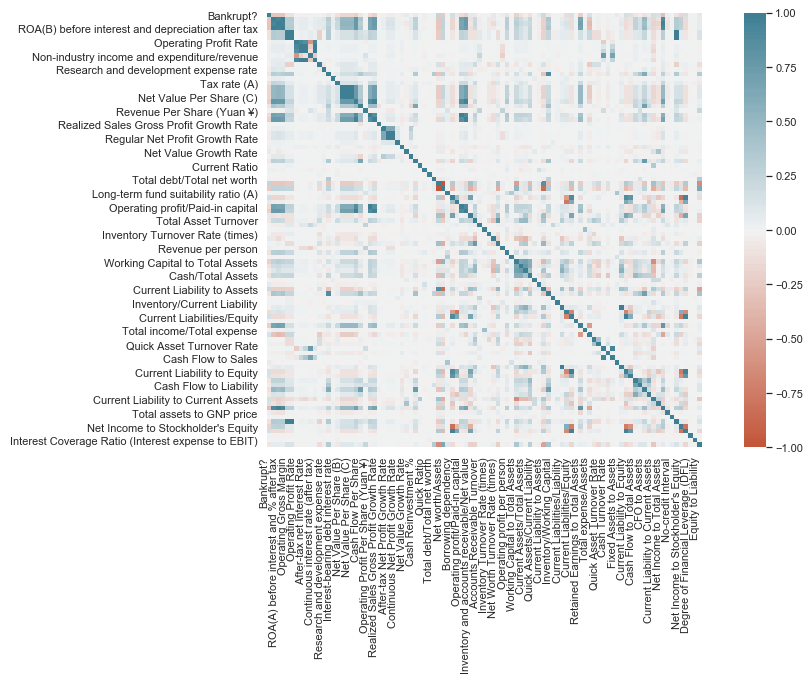

In [5]:
## Calling corellation heat map funtion but useless since too many features
corr_hmap(df)

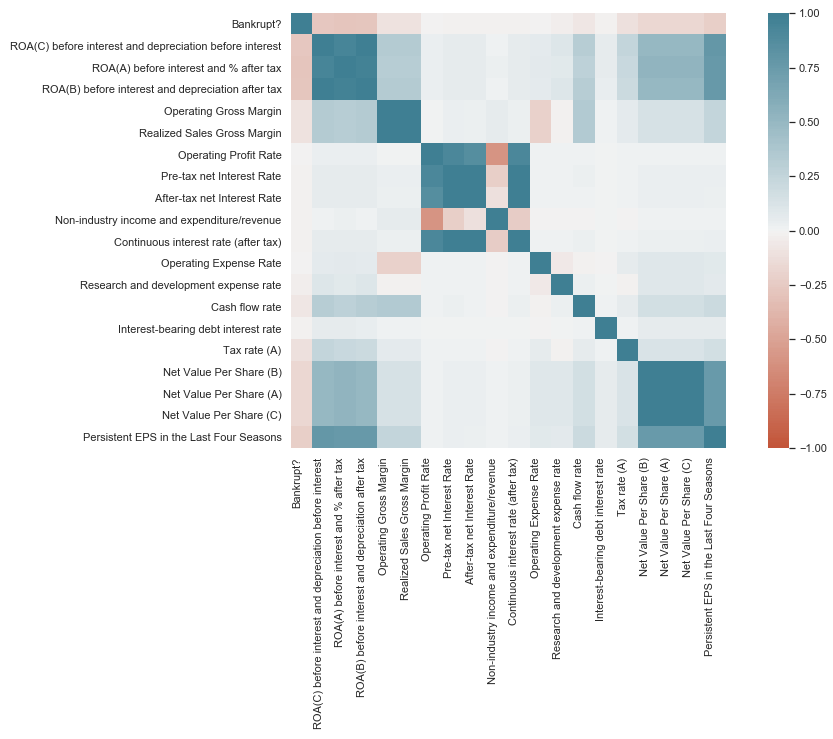

In [6]:
# Taking only first 20 columns
corr_hmap(df.iloc[:,:20])

In [7]:
#Converting Output variable "Bankrupt?" to catagorical variable for classification.
df = col_dtype(df,['Bankrupt?'],'category')
df_details(df,3)

Data Types of Column: 
 Bankrupt?                                                   category
 ROA(C) before interest and depreciation before interest     float64
 ROA(A) before interest and % after tax                      float64
 ROA(B) before interest and depreciation after tax           float64
 Operating Gross Margin                                      float64
                                                              ...   
 Liability to Equity                                         float64
 Degree of Financial Leverage (DFL)                          float64
 Interest Coverage Ratio (Interest expense to EBIT)          float64
 Net Income Flag                                               int64
 Equity to Liability                                         float64
Length: 96, dtype: object

 Size of Datarame:  (6819, 96)

 Top and bottom  3  rows: 



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [8]:
#Checking if any missing values
miss_ch(df)

Available data with no nulls:  6819


'Deatils of Null values column wise'

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

#### No Missing values. Awesome

### Checking the Class balance
As these types of problems have usually class imbalnce issue.

In [9]:
# Checking the no of rows in each class
print('Row count with bankcruptcy: ',row_drop(df,0,'Bankrupt?')['Bankrupt?'].count())
print('Row count without bankcruptcy: ',row_drop(df,1,'Bankrupt?')['Bankrupt?'].count())

Row count with bankcruptcy:  220
Row count without bankcruptcy:  6599


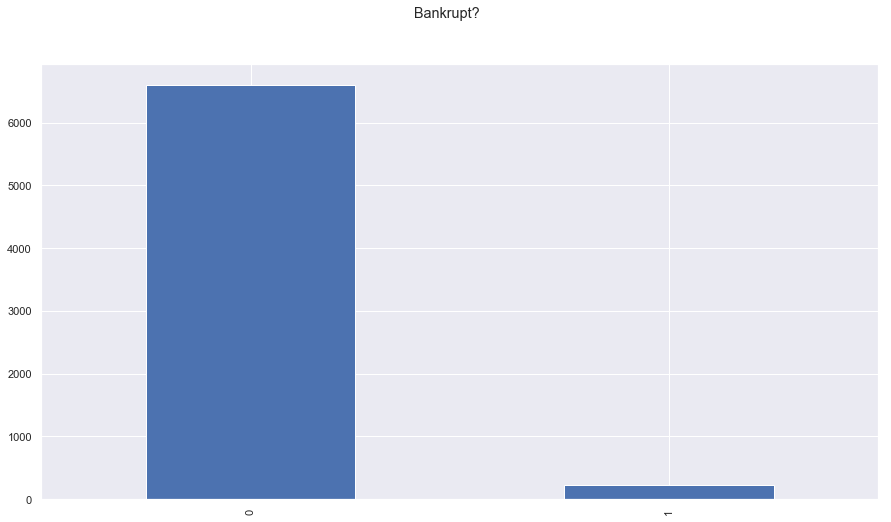

In [15]:
data_cat(df,col_int=['Bankrupt?'])

#### There is class imbalance as only 220 datapoints with positive as compared to 6599 negative class.

### Using Random Forest 

'Classification Report'

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2178
           1       0.33      0.23      0.27        73

    accuracy                           0.96      2251
   macro avg       0.65      0.61      0.63      2251
weighted avg       0.95      0.96      0.96      2251

Accuracy on Train Data is:  95.95735228787206 %
AUC score is:  0.6084034617658528
Logloss is:  1.396293486382466


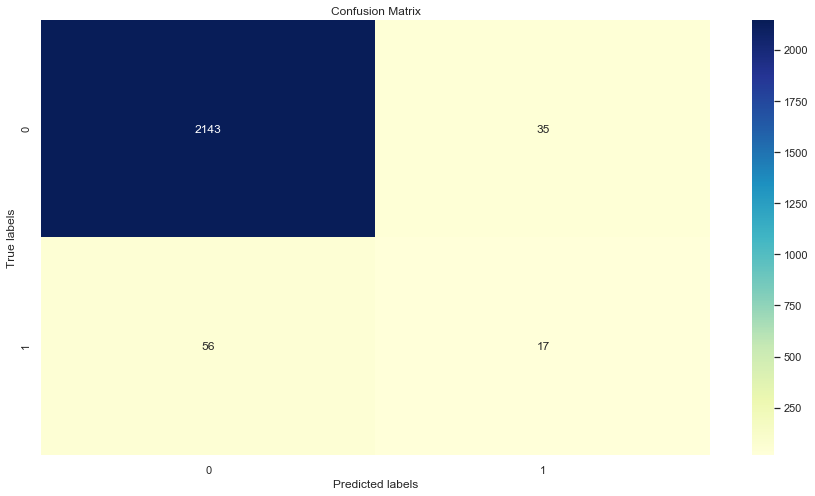

In [16]:
x = col_drop(df,['Bankrupt?'],typ=0)
y = df['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# Calling Mexhinge Learning method with different algorothms of classification and regression
cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
con_mat(cm,['0','1'])
display("Classification Report")
print(cr)
print("Accuracy on Train Data is: ",acc*100,"%")
print("AUC score is: ",auc)
print("Logloss is: ",ll)

#### Model performace is extremely bad on positive class its unable to learn ths class due to very few rows as visible in F1 score for positive class and confusion matrix but overall accuracy in 96% due to the large class imbalance

## Trying by balancing the class

In [18]:
## Upsampling minority class and down sampling majority class 
from sklearn.utils import resample
df_majority = row_drop(df,1,'Bankrupt?')
df_minority = row_drop(df,0,'Bankrupt?') 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3000,    # to match majority class
                                 random_state=123) # reproducible results
df_majority_under = resample(df_majority, 
                                replace=False,     # sample with replacement
                                n_samples=4000,    # to match majority class
                                random_state=123) # reproducible results
# Combine majority class with upsampled minority class
df_smp = pd.concat([df_majority_under, df_minority_upsampled])
# Display new class counts
df_smp['Bankrupt?'].value_counts()

0    4000
1    3000
Name: Bankrupt?, dtype: int64

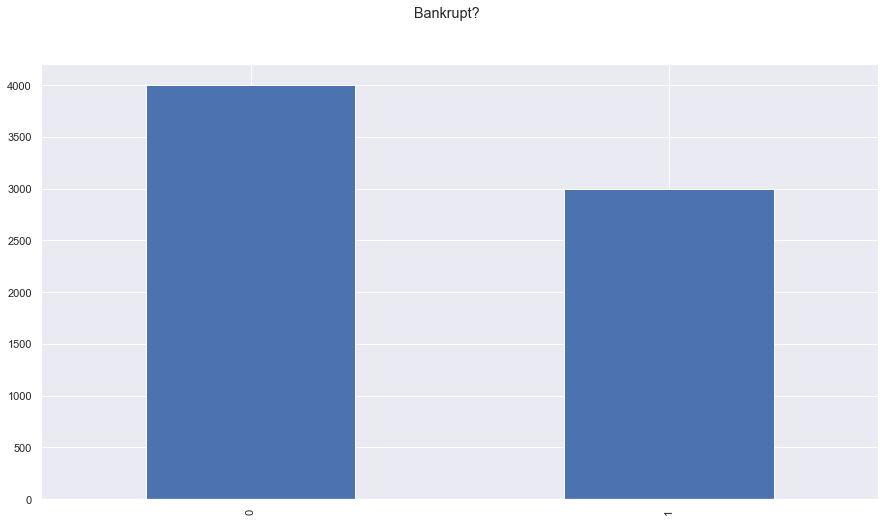

In [19]:
data_cat(col_dtype(df_smp,['Bankrupt?'],dtyp = 'category'),col_int=['Bankrupt?'])

'Classification Report'

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1313
           1       0.96      1.00      0.98       997

    accuracy                           0.98      2310
   macro avg       0.98      0.98      0.98      2310
weighted avg       0.98      0.98      0.98      2310

Accuracy on Train Data is:  98.26839826839827 %
AUC score is:  0.9847677075399848
Logloss is:  0.5980878959712715


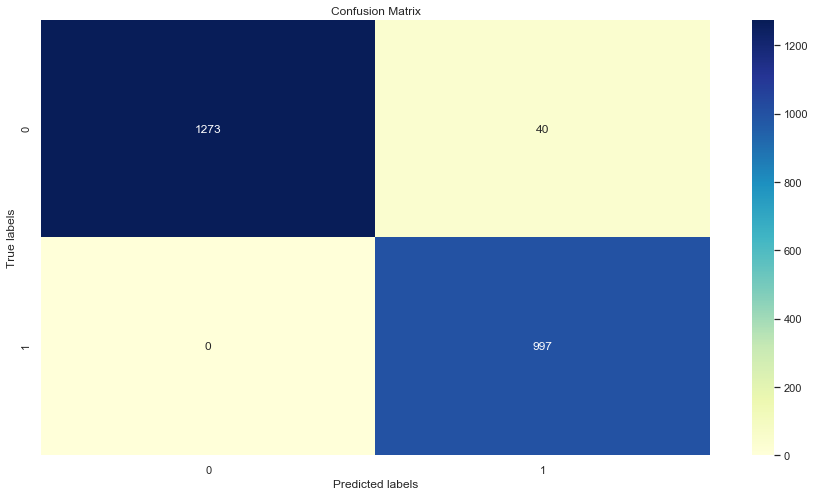

In [21]:
x = col_drop(df_smp,['Bankrupt?'],typ=0)
y = df_smp['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# Calling Mexhinge Learning method with different algorothms of classification and regression
cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
con_mat(cm,['0','1'])
display("Classification Report")
print(cr)
print("Accuracy on Train Data is: ",acc*100,"%")
print("AUC score is: ",auc)
print("Logloss is: ",ll)

#### By upsampling the minority class and down sampling majority class overall accuracy change  a little bit but  positive class accuracy increased.

### Selecting Top features using ANOVA F-stats and RFFS

In [24]:
#First checking top features with to 10
for i in range(1,10):
    x_fs,y,fs = feature_selectk(df,i)
    # Get columns names selected by algo 
    columns = fs.get_support(indices=True)
    print("Top :",i," features")
    print(df.columns[columns].values)

Top : 1  features
[' Liability-Assets Flag']
Top : 2  features
[' ROA(C) before interest and depreciation before interest'
 ' Liability-Assets Flag']
Top : 3  features
[' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax' ' Liability-Assets Flag']
Top : 4  features
['Bankrupt?' ' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax' ' Liability-Assets Flag']
Top : 5  features
['Bankrupt?' ' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax' ' Debt ratio %'
 ' Liability-Assets Flag']
Top : 6  features
['Bankrupt?' ' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax' ' Total debt/Total net worth'
 ' Debt ratio %' ' Liability-Assets Flag']
Top : 7  features
['Bankrupt?' ' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax' ' Net Value Per Share (C)'
 '

Feature 0: 497.535121
Feature 1: 593.228629
Feature 2: 549.202093
Feature 3: 68.918755
Feature 4: 68.089109
Feature 5: 0.000360
Feature 6: 0.494484
Feature 7: 0.534838
Feature 8: 1.877343
Feature 9: 0.480453
Feature 10: 0.252277
Feature 11: 4.005214
Feature 12: 35.877044
Feature 13: 3.627845
Feature 14: 83.044337
Feature 15: 191.736866
Feature 16: 191.893599
Feature 17: 190.273698
Feature 18: 345.267517
Feature 19: 41.209620
Feature 20: 0.150081
Feature 21: 140.388750
Feature 22: 288.185465
Feature 23: 0.001432
Feature 24: 1.568725
Feature 25: 9.745541
Feature 26: 9.254275
Feature 27: 0.602519
Feature 28: 13.484166
Feature 29: 29.219210
Feature 30: 1.937815
Feature 31: 18.019367
Feature 32: 0.033334
Feature 33: 4.283205
Feature 34: 0.048997
Feature 35: 1.033780
Feature 36: 455.091151
Feature 37: 455.091151
Feature 38: 1.952151
Feature 39: 219.303339
Feature 40: 34.007305
Feature 41: 138.500753
Feature 42: 307.823235
Feature 43: 38.850664
Feature 44: 31.588910
Feature 45: 0.154063
Featu

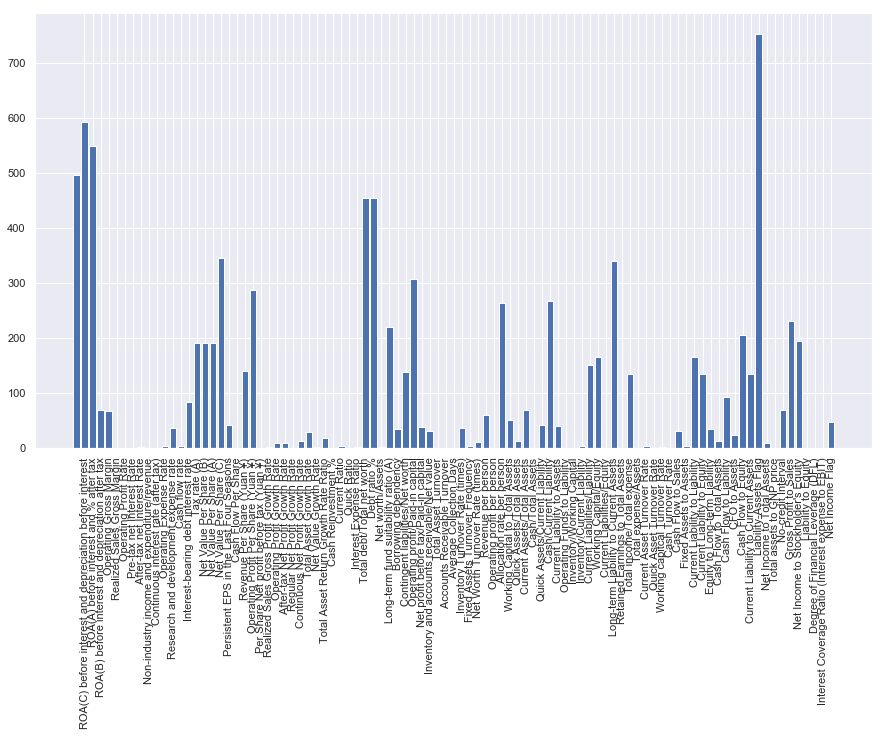

In [25]:
# Selecting top 7 features
x_fs,y,fs = feature_selectk(df,7)
# Displaying the fcore of calculating for each varible
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(range(1,len(fs.scores_)),df.iloc[:,1:len(df)-1].columns,rotation=90)
plt.show()

Feature: 0, Score: 0.01390
Feature: 1, Score: 0.00563
Feature: 2, Score: 0.01345
Feature: 3, Score: 0.00499
Feature: 4, Score: 0.00610
Feature: 5, Score: 0.00358
Feature: 6, Score: 0.00422
Feature: 7, Score: 0.00538
Feature: 8, Score: 0.01407
Feature: 9, Score: 0.01302
Feature: 10, Score: 0.01754
Feature: 11, Score: 0.01209
Feature: 12, Score: 0.00445
Feature: 13, Score: 0.03433
Feature: 14, Score: 0.00450
Feature: 15, Score: 0.00777
Feature: 16, Score: 0.00390
Feature: 17, Score: 0.00448
Feature: 18, Score: 0.03228
Feature: 19, Score: 0.00475
Feature: 20, Score: 0.00453
Feature: 21, Score: 0.00387
Feature: 22, Score: 0.00611
Feature: 23, Score: 0.01235
Feature: 24, Score: 0.00964
Feature: 25, Score: 0.00489
Feature: 26, Score: 0.00425
Feature: 27, Score: 0.00994
Feature: 28, Score: 0.00882
Feature: 29, Score: 0.09855
Feature: 30, Score: 0.01353
Feature: 31, Score: 0.00515
Feature: 32, Score: 0.00396
Feature: 33, Score: 0.01966
Feature: 34, Score: 0.01695
Feature: 35, Score: 0.00453
Fe

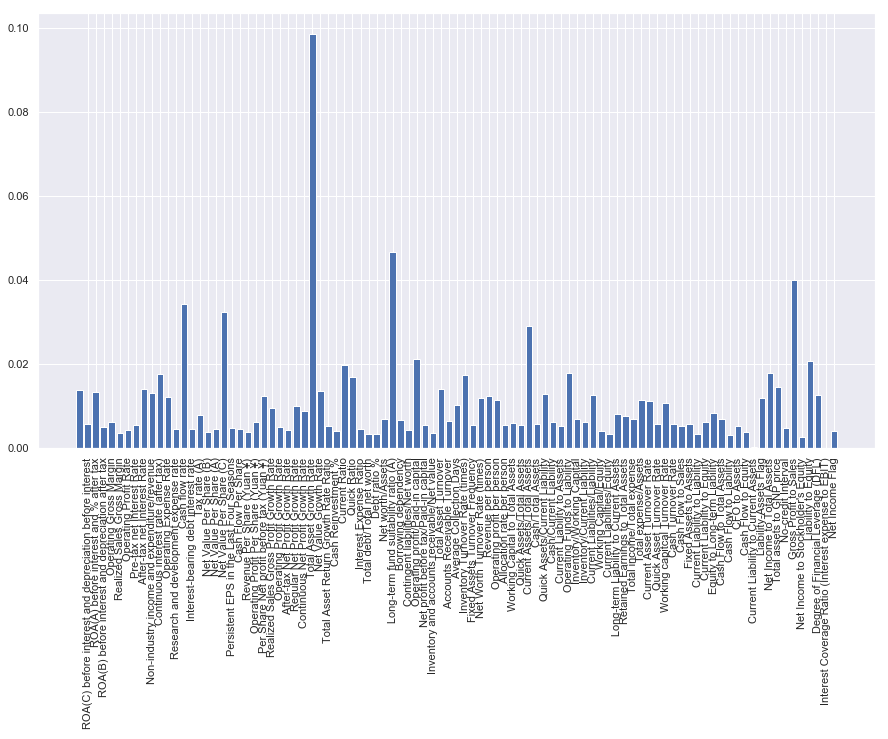

In [28]:
importantfeat_rffs(df,reg=False)

## Applying different Classification Algorithms and Comparing Results
ALL reslts compiled on excel

knn
Precision:  10.0
Recall:  1.36986301369863
AUC score is:  0.5047831993660138
Accuracy on Test Data is:  96.4015992892048 %


<Figure size 1080x576 with 0 Axes>

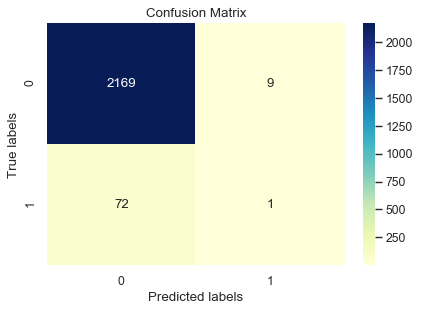


naive
Precision:  3.273397879207008
Recall:  97.26027397260275
AUC score is:  0.5046668427739411
Accuracy on Test Data is:  6.70812972012439 %


<Figure size 1080x576 with 0 Axes>

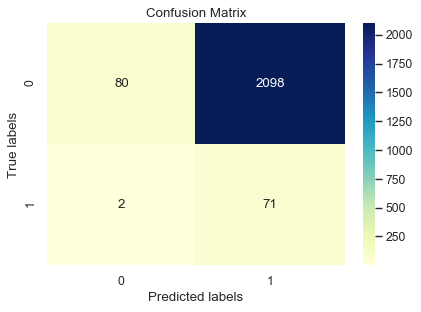


logit
Precision:  0.0
Recall:  0.0
AUC score is:  0.4995408631772268
Accuracy on Test Data is:  96.66814749000444 %


<Figure size 1080x576 with 0 Axes>

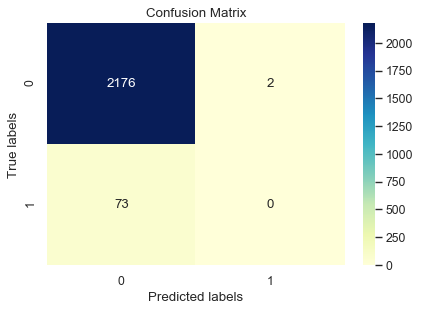


mlp
Precision:  8.771929824561402
Recall:  6.8493150684931505
AUC score is:  0.522309017950363
Accuracy on Test Data is:  94.66903598400711 %


<Figure size 1080x576 with 0 Axes>

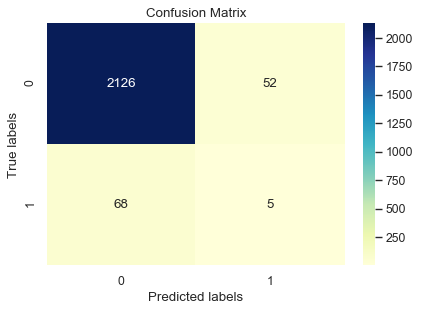


svc
Precision:  0.0
Recall:  0.0
AUC score is:  0.5
Accuracy on Test Data is:  96.75699689027098 %


<Figure size 1080x576 with 0 Axes>

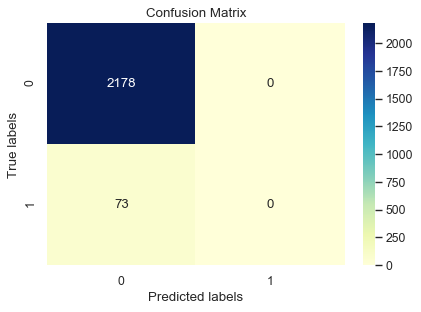


decisiontree
Precision:  70.0
Recall:  9.58904109589041
AUC score is:  0.5472565002452923
Accuracy on Test Data is:  96.93469569080409 %


<Figure size 1080x576 with 0 Axes>

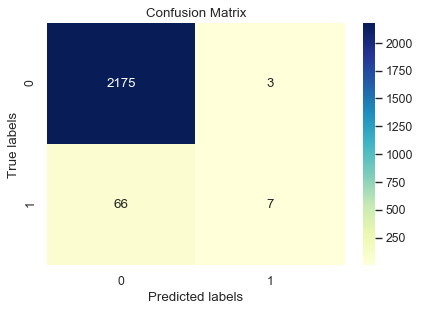


randomforest
Precision:  30.76923076923077
Recall:  21.91780821917808
AUC score is:  0.6013245782859731
Accuracy on Test Data is:  95.86850288760552 %


<Figure size 1080x576 with 0 Axes>

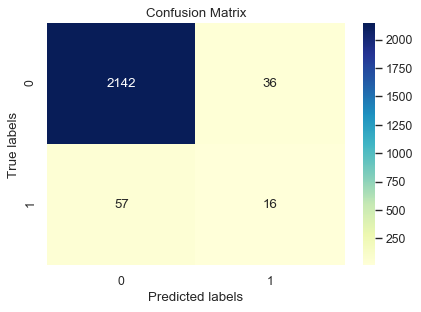


[02:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Precision:  45.94594594594595
Recall:  23.28767123287671
AUC score is:  0.6118469879366517
Accuracy on Test Data is:  96.62372278987117 %


<Figure size 1080x576 with 0 Axes>

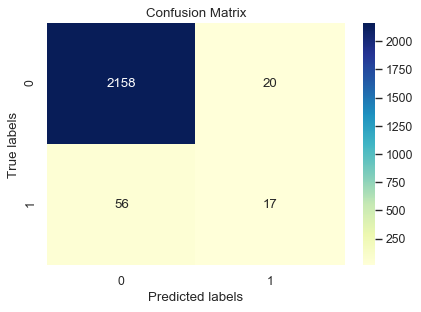


adaboost
Precision:  48.888888888888886
Recall:  30.136986301369863
AUC score is:  0.6454048580449576
Accuracy on Test Data is:  96.7125721901377 %


<Figure size 1080x576 with 0 Axes>

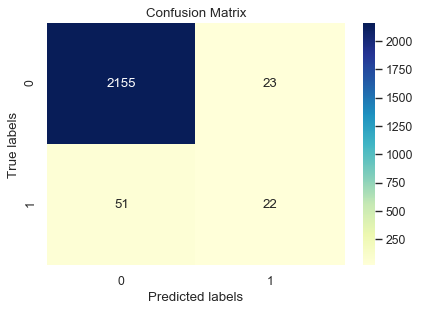


gboost
Precision:  46.34146341463415
Recall:  26.027397260273972
AUC score is:  0.6250864812508649
Accuracy on Test Data is:  96.62372278987117 %


<Figure size 1080x576 with 0 Axes>

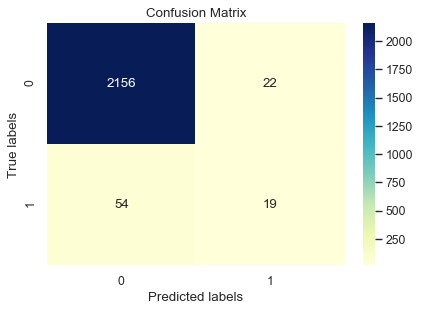

In [38]:
all_algo = ['knn','naive','logit','mlp','svc', 'decisiontree','randomforest','xgboost','adaboost','gboost']

i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Bankrupt?'],algor=alg,fs=False,cv=False,ci=False)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

knn
Precision:  91.93590965438477
Recall:  91.86657681940702
AUC score is:  0.09177897574123989
Accuracy on Test Data is:  91.89330426296829 %


<Figure size 1080x576 with 0 Axes>

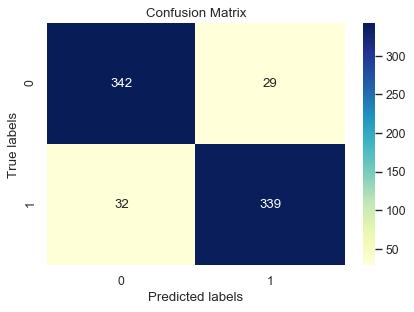


naive
Precision:  90.43813228364691
Recall:  7.620786598266816
AUC score is:  0.053369272237196765
Accuracy on Test Data is:  53.40669247205727 %


<Figure size 1080x576 with 0 Axes>

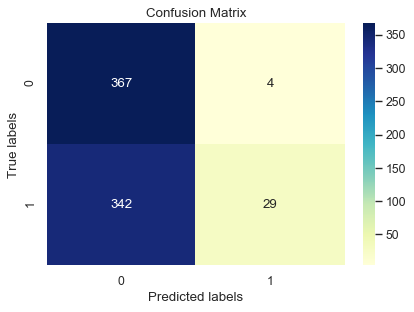


logit
Precision:  66.46203678283231
Recall:  40.85463582876851
AUC score is:  0.057951482479784364
Accuracy on Test Data is:  60.11294997696379 %


<Figure size 1080x576 with 0 Axes>

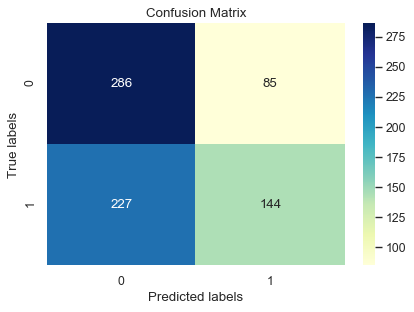


mlp
Precision:  61.02889055072313
Recall:  58.25210851230329
AUC score is:  0.05013477088948788
Accuracy on Test Data is:  55.614667716295486 %


<Figure size 1080x576 with 0 Axes>

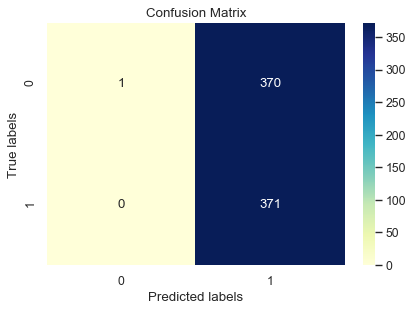


svc
Precision:  68.11078334324974
Recall:  35.44184563661131
AUC score is:  0.05889487870619946
Accuracy on Test Data is:  59.41299387273129 %


<Figure size 1080x576 with 0 Axes>

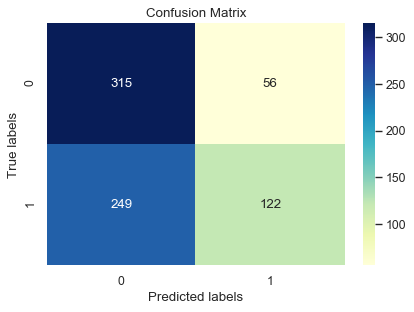


decisiontree
Precision:  86.73830912356581
Recall:  90.19679448163927
AUC score is:  0.08948787061994609
Accuracy on Test Data is:  88.16345187609059 %


<Figure size 1080x576 with 0 Axes>

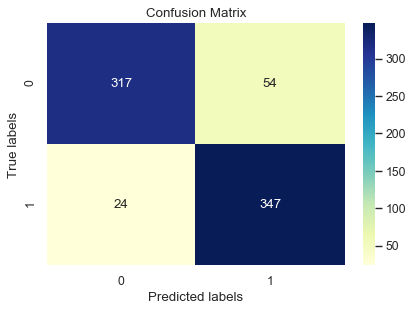


randomforest
Precision:  96.92342531038106
Recall:  100.0
AUC score is:  0.09797843665768194
Accuracy on Test Data is:  98.41095507757943 %


<Figure size 1080x576 with 0 Axes>

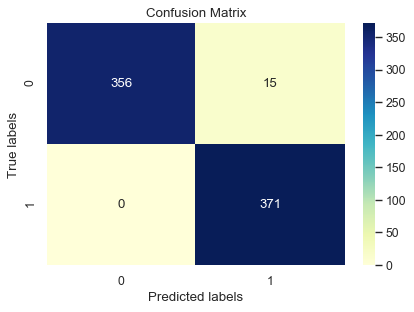


[02:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:49:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

<Figure size 1080x576 with 0 Axes>

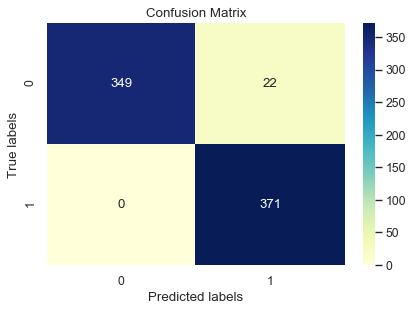


adaboost
Precision:  92.60315902603779
Recall:  98.6540300843405
AUC score is:  0.09460916442048517
Accuracy on Test Data is:  95.38125832115014 %


<Figure size 1080x576 with 0 Axes>

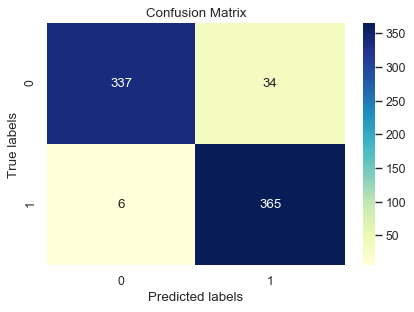


gboost
Precision:  92.87240751596825
Recall:  99.83849230501696
AUC score is:  0.09568733153638813
Accuracy on Test Data is:  96.08143209034546 %


<Figure size 1080x576 with 0 Axes>

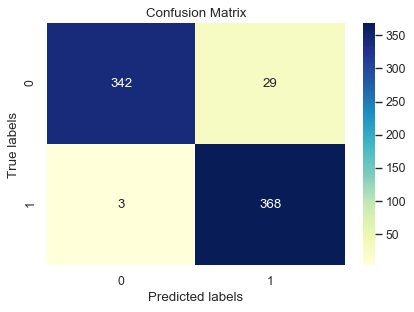

In [39]:
i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Bankrupt?'],algor=alg,fs=True,cv=True,ci=True)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

knn
Precision:  28.57142857142857
Recall:  10.95890410958904
AUC score is:  0.5502031523202133
Accuracy on Test Data is:  96.2239004886717 %


<Figure size 1080x576 with 0 Axes>

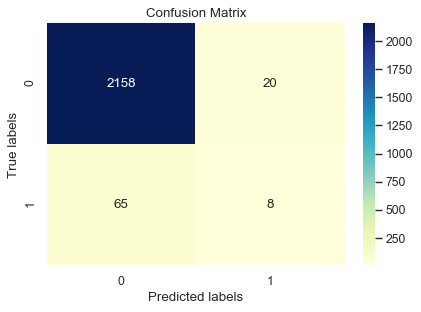


naive
Precision:  15.0
Recall:  4.10958904109589
AUC score is:  0.5166452822119074
Accuracy on Test Data is:  96.13505108840515 %


<Figure size 1080x576 with 0 Axes>

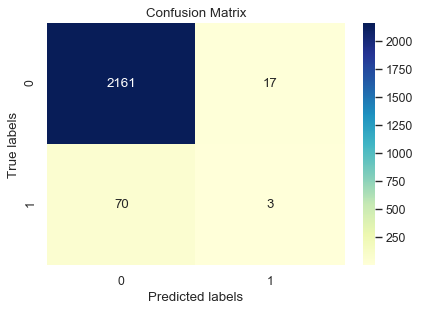


logit
Precision:  11.11111111111111
Recall:  1.36986301369863
AUC score is:  0.5050127677774005
Accuracy on Test Data is:  96.44602398933807 %


<Figure size 1080x576 with 0 Axes>

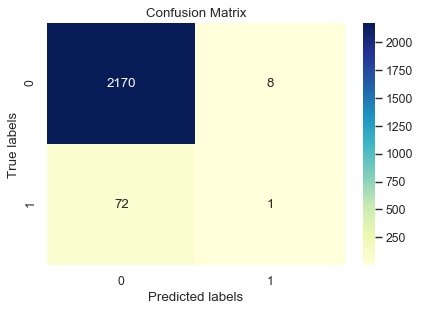


mlp
Precision:  17.24137931034483
Recall:  6.8493150684931505
AUC score is:  0.5287369334691875
Accuracy on Test Data is:  95.91292758773878 %


<Figure size 1080x576 with 0 Axes>

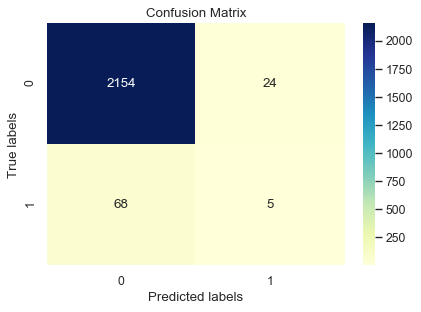


svc
Precision:  0.0
Recall:  0.0
AUC score is:  0.5
Accuracy on Test Data is:  96.75699689027098 %


<Figure size 1080x576 with 0 Axes>

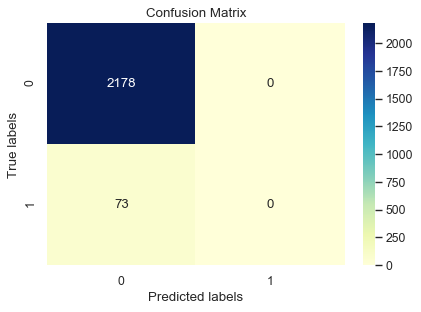


decisiontree
Precision:  85.71428571428571
Recall:  8.21917808219178
AUC score is:  0.5408663219995722
Accuracy on Test Data is:  96.97912039093735 %


<Figure size 1080x576 with 0 Axes>

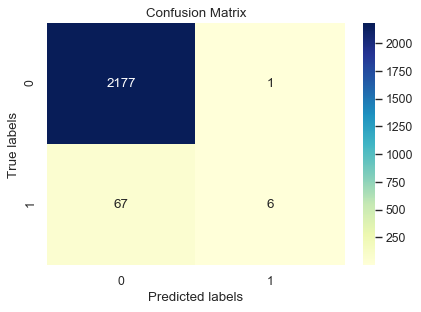


randomforest
Precision:  44.89795918367347
Recall:  30.136986301369863
AUC score is:  0.6444865843994113
Accuracy on Test Data is:  96.53487338960463 %


<Figure size 1080x576 with 0 Axes>

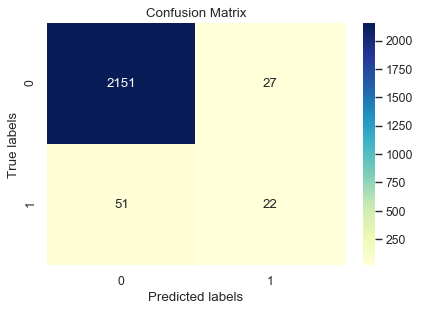


[02:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Precision:  58.82352941176471
Recall:  27.397260273972602
AUC score is:  0.6337723436104507
Accuracy on Test Data is:  97.02354509107064 %


<Figure size 1080x576 with 0 Axes>

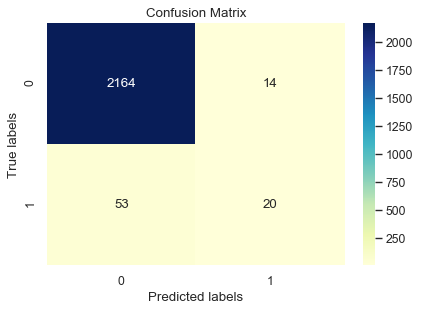


adaboost
Precision:  48.38709677419355
Recall:  20.54794520547945
AUC score is:  0.5990666314452117
Accuracy on Test Data is:  96.7125721901377 %


<Figure size 1080x576 with 0 Axes>

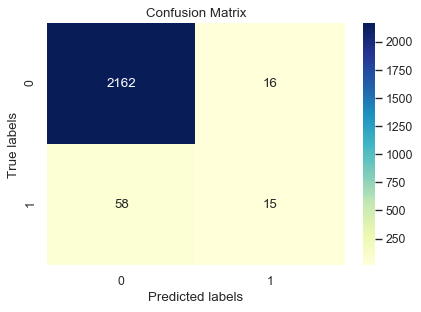


gboost
Precision:  47.5
Recall:  26.027397260273972
AUC score is:  0.6253160496622513
Accuracy on Test Data is:  96.66814749000444 %


<Figure size 1080x576 with 0 Axes>

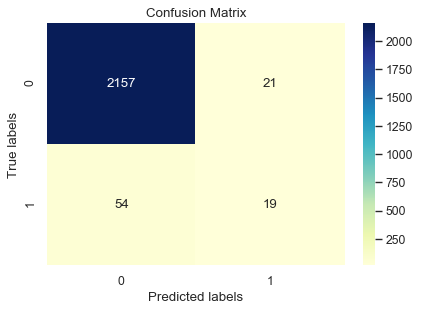

In [40]:
i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Bankrupt?'],algor=alg,fs=True,cv=False,ci=False)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

knn
Precision:  89.38307030129124
Recall:  100.0
AUC score is:  0.9385892116182573
Accuracy on Test Data is:  93.96164830681354 %


<Figure size 1080x576 with 0 Axes>

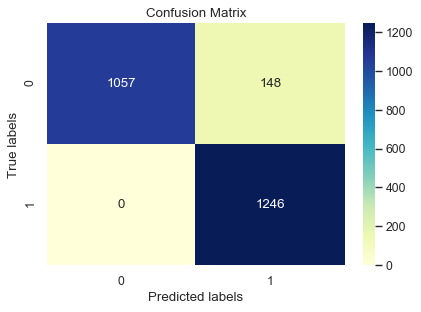


naive
Precision:  92.85714285714286
Recall:  8.346709470304976
AUC score is:  0.5384140452768361
Accuracy on Test Data is:  53.080375356997145 %


<Figure size 1080x576 with 0 Axes>

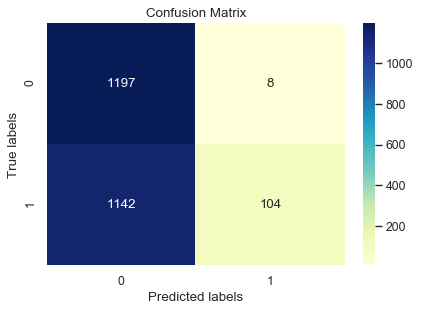


logit
Precision:  65.72972972972973
Recall:  48.796147672552166
AUC score is:  0.6124454686532174
Accuracy on Test Data is:  61.03631170950632 %


<Figure size 1080x576 with 0 Axes>

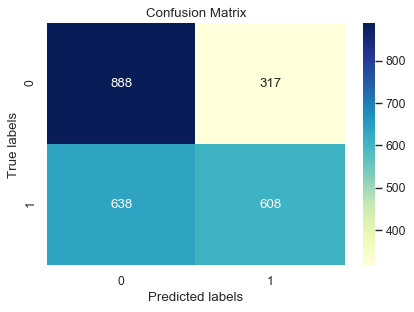


mlp
Precision:  52.61824324324324
Recall:  100.0
AUC score is:  0.5344398340248963
Accuracy on Test Data is:  54.22276621787026 %


<Figure size 1080x576 with 0 Axes>

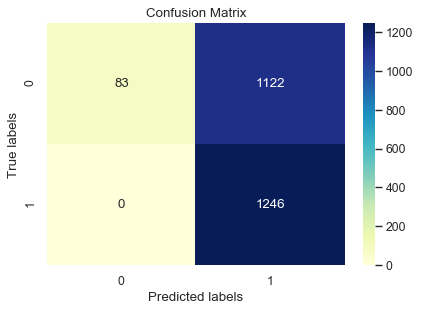


svc
Precision:  74.51708766716196
Recall:  80.4975922953451
AUC score is:  0.7601643100244434
Accuracy on Test Data is:  76.09139126886984 %


<Figure size 1080x576 with 0 Axes>

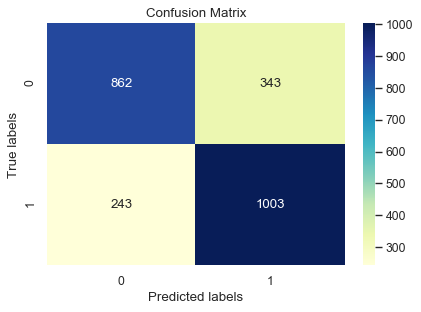


decisiontree
Precision:  85.18242740134029
Recall:  91.81380417335474
AUC score is:  0.87649640675889
Accuracy on Test Data is:  87.71929824561403 %


<Figure size 1080x576 with 0 Axes>

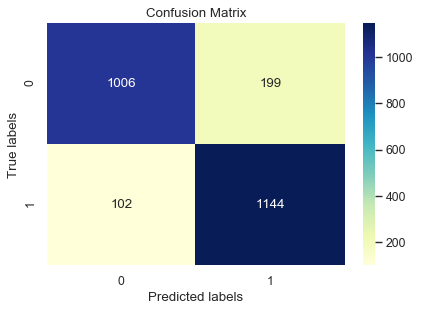


randomforest
Precision:  96.5143299767622
Recall:  100.0
AUC score is:  0.9813278008298756
Accuracy on Test Data is:  98.1640146878825 %


<Figure size 1080x576 with 0 Axes>

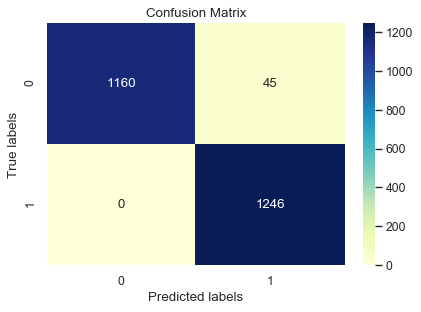


[02:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Precision:  94.17989417989418
Recall:  100.0
AUC score is:  0.9680497925311203
Accuracy on Test Data is:  96.85842513259894 %


<Figure size 1080x576 with 0 Axes>

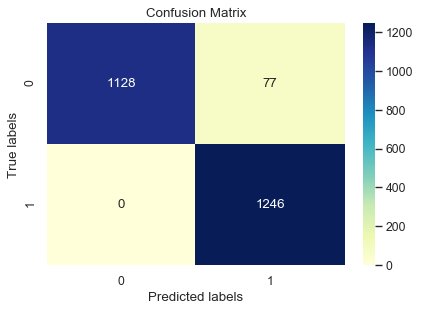


adaboost
Precision:  92.67015706806284
Recall:  99.43820224719101
AUC score is:  0.9565271108210173
Accuracy on Test Data is:  95.71603427172583 %


<Figure size 1080x576 with 0 Axes>

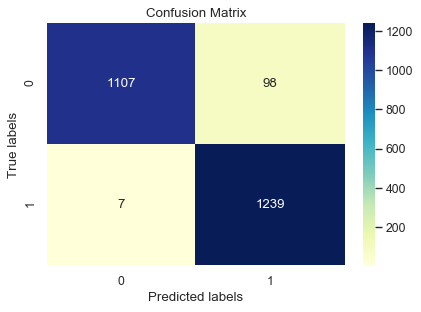


gboost
Precision:  93.05451829723674
Recall:  100.0
AUC score is:  0.9614107883817428
Accuracy on Test Data is:  96.20563035495717 %


<Figure size 1080x576 with 0 Axes>

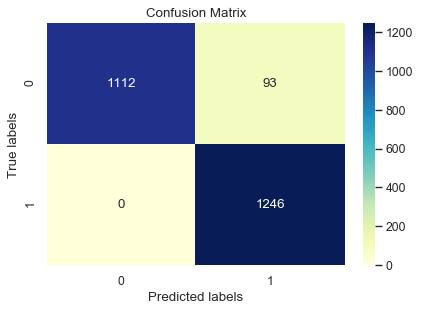

In [37]:
i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Bankrupt?'],algor=alg,fs=False,cv=False,ci=True)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

knn
Precision:  10.0
Recall:  1.36986301369863
AUC score is:  0.5047831993660138
Accuracy on Test Data is:  96.4015992892048 %


<Figure size 1080x576 with 0 Axes>

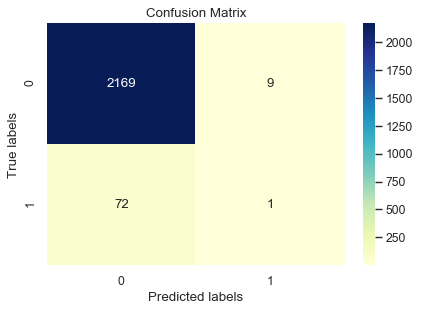


naive
Precision:  3.273397879207008
Recall:  97.26027397260275
AUC score is:  0.5046668427739411
Accuracy on Test Data is:  6.70812972012439 %


<Figure size 1080x576 with 0 Axes>

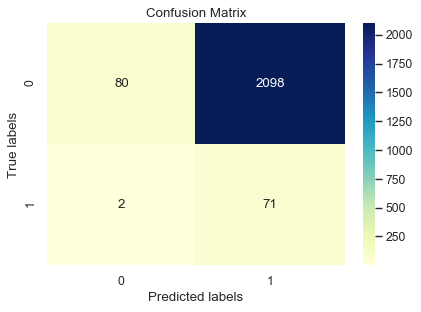


logit
Precision:  0.0
Recall:  0.0
AUC score is:  0.4995408631772268
Accuracy on Test Data is:  96.66814749000444 %


<Figure size 1080x576 with 0 Axes>

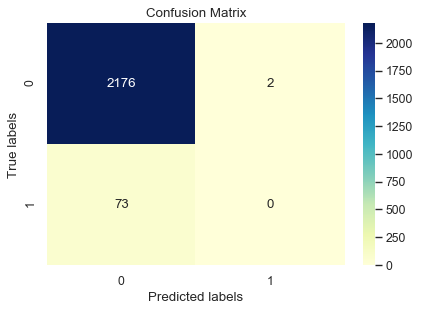


mlp
Precision:  0.0
Recall:  0.0
AUC score is:  0.49770431588613406
Accuracy on Test Data is:  96.31274988893826 %


<Figure size 1080x576 with 0 Axes>

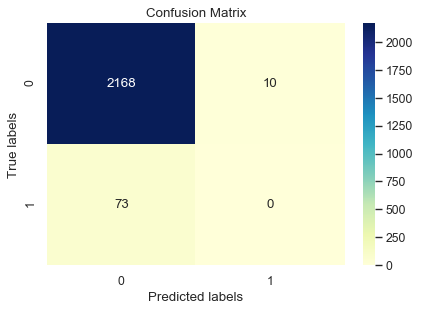


svc
Precision:  0.0
Recall:  0.0
AUC score is:  0.5
Accuracy on Test Data is:  96.75699689027098 %


<Figure size 1080x576 with 0 Axes>

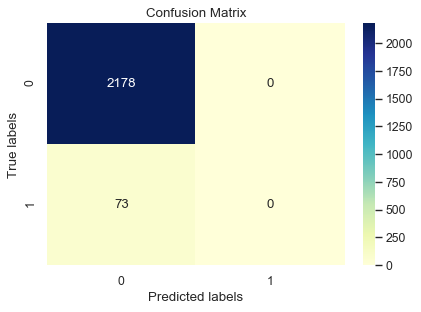


decisiontree
Precision:  77.77777777777779
Recall:  9.58904109589041
AUC score is:  0.5474860686566788
Accuracy on Test Data is:  96.97912039093735 %


<Figure size 1080x576 with 0 Axes>

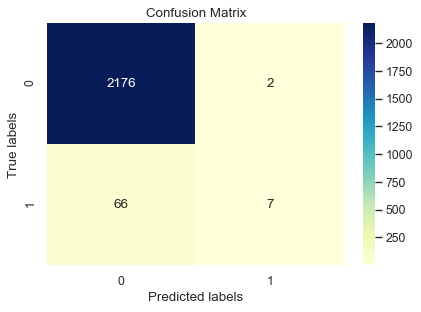


randomforest
Precision:  34.090909090909086
Recall:  20.54794520547945
AUC score is:  0.596082242097186
Accuracy on Test Data is:  96.13505108840515 %


<Figure size 1080x576 with 0 Axes>

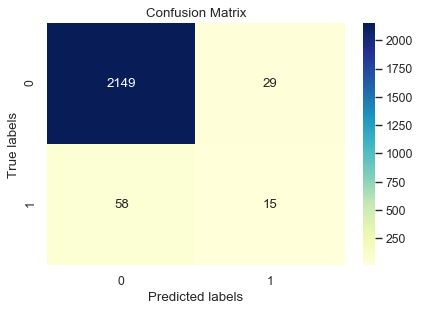


[02:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Precision:  45.94594594594595
Recall:  23.28767123287671
AUC score is:  0.6118469879366517
Accuracy on Test Data is:  96.62372278987117 %


<Figure size 1080x576 with 0 Axes>

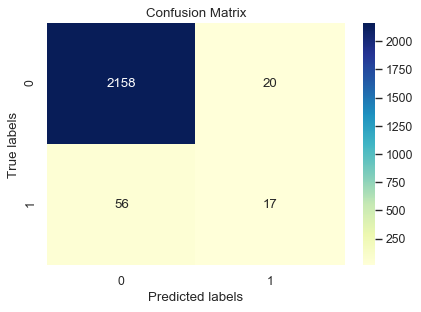


adaboost
Precision:  48.888888888888886
Recall:  30.136986301369863
AUC score is:  0.6454048580449576
Accuracy on Test Data is:  96.7125721901377 %


<Figure size 1080x576 with 0 Axes>

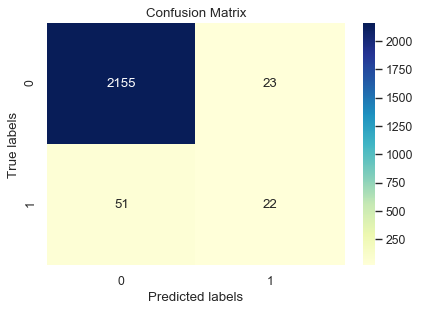


gboost
Precision:  50.0
Recall:  26.027397260273972
AUC score is:  0.6257751864850245
Accuracy on Test Data is:  96.75699689027098 %


<Figure size 1080x576 with 0 Axes>

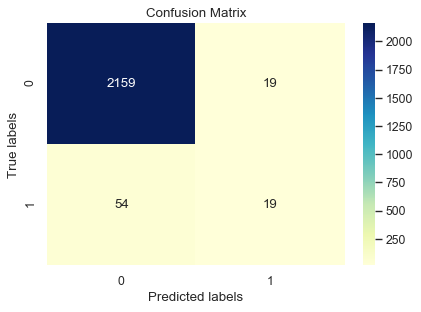

In [36]:
i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Bankrupt?'],algor=alg,fs=False,cv=True,ci=False)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

## Finetuning and Comparing Results

Majority class resampled:  6000 Minority class resampled:  4000
Precision:  97.5502204801568
Recall:  100.0
AUC score is:  0.9809014514896868
Accuracy on Test Data is:  98.48484848484848 %


<Figure size 1080x576 with 0 Axes>

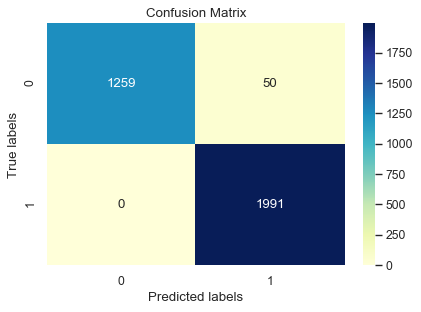


Majority class resampled:  5000 Minority class resampled:  4000
Precision:  96.66666666666667
Recall:  100.0
AUC score is:  0.978359908883827
Accuracy on Test Data is:  98.08080808080808 %


<Figure size 1080x576 with 0 Axes>

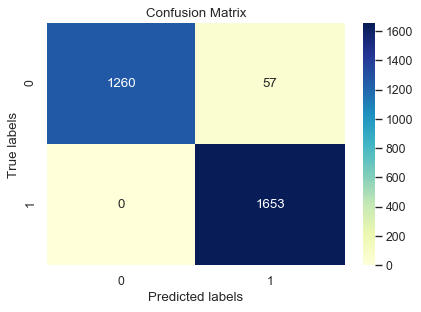


Majority class resampled:  4000 Minority class resampled:  4000
Precision:  96.58430232558139
Recall:  100.0
AUC score is:  0.9820747520976354
Accuracy on Test Data is:  98.21969696969697 %


<Figure size 1080x576 with 0 Axes>

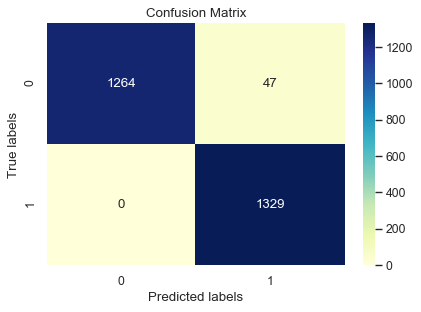


Majority class resampled:  5000 Minority class resampled:  5000
Precision:  96.5436438195665
Recall:  100.0
AUC score is:  0.9821428571428572
Accuracy on Test Data is:  98.21212121212122 %


<Figure size 1080x576 with 0 Axes>

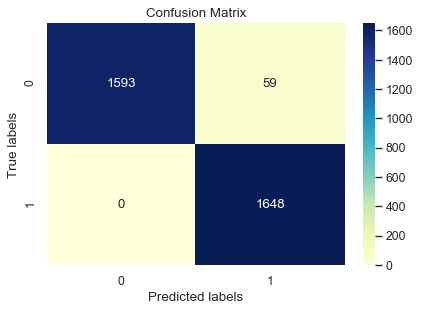


Majority class resampled:  6000 Minority class resampled:  6000
Precision:  97.38298943130347
Recall:  100.0
AUC score is:  0.9871604938271604
Accuracy on Test Data is:  98.68686868686869 %


<Figure size 1080x576 with 0 Axes>

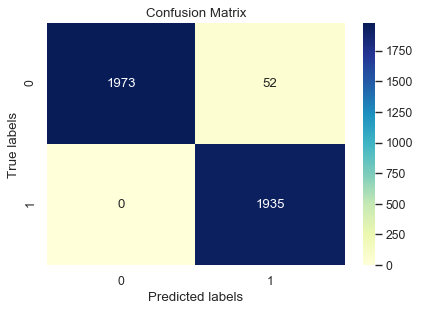


Majority class resampled:  5000 Minority class resampled:  3000
Precision:  97.38562091503267
Recall:  100.0
AUC score is:  0.9780219780219781
Accuracy on Test Data is:  98.33333333333333 %


<Figure size 1080x576 with 0 Axes>

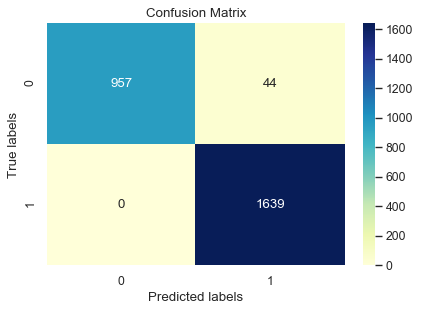

In [21]:
## Changing Class balance and checking resuts
majl = [6000,5000,4000,5000,6000,5000]
minrl = [4000,4000,4000,5000,6000,3000]
all_algo = ['knn','naive','logit','mlp','svc', 'decisiontree','randomforest','xgboost','adaboost','gboost']
colum = ['Bankrupt?']
for i in range(0,6):
    df_smp = class_imbalance_no(df,minr=majl[i],maj=minrl[i],minor=0,col=['Bankrupt?'])
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    x = col_drop(df_smp,colum,typ=0)
    y = df_smp[colum]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
    print("Majority class resampled: ",majl[i],"Minority class resampled: ",minrl[i])
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
#data_cat(col_dtype(df_smp,['Bankrupt?'],dtyp = 'category'),col_int=['Bankrupt?'])

[22:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  6000 Minority class resampled:  4000
Precision:  95.21759923481588
Recall:  100.0
AUC score is:  0.9618029029793735
Accuracy on Test Data is:  96.96969696969697 %


<Figure size 1080x576 with 0 Axes>

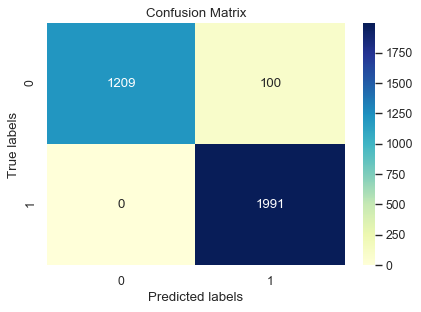


[22:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  5000 Minority class resampled:  4000
Precision:  94.40319817247287
Recall:  100.0
AUC score is:  0.9627942293090357
Accuracy on Test Data is:  96.70033670033669 %


<Figure size 1080x576 with 0 Axes>

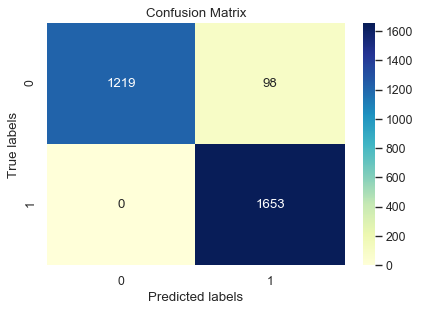


[22:02:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  4000 Minority class resampled:  4000
Precision:  93.45991561181435
Recall:  100.0
AUC score is:  0.9645308924485125
Accuracy on Test Data is:  96.47727272727272 %


<Figure size 1080x576 with 0 Axes>

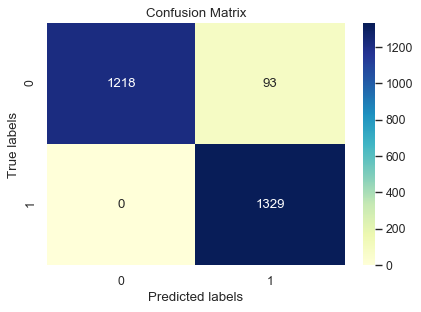


[22:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  5000 Minority class resampled:  5000
Precision:  93.159977388355
Recall:  100.0
AUC score is:  0.9633777239709442
Accuracy on Test Data is:  96.33333333333334 %


<Figure size 1080x576 with 0 Axes>

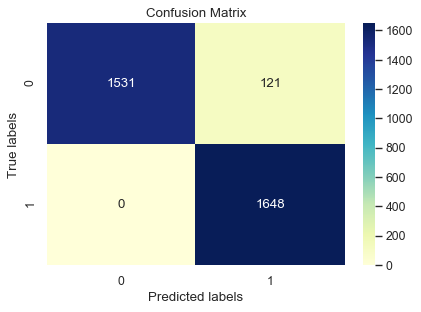


[22:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  6000 Minority class resampled:  6000
Precision:  93.07359307359307
Recall:  100.0
AUC score is:  0.9644444444444444
Accuracy on Test Data is:  96.36363636363636 %


<Figure size 1080x576 with 0 Axes>

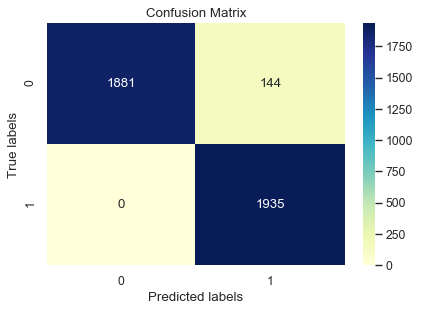


[22:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  5000 Minority class resampled:  3000
Precision:  95.34613147178592
Recall:  100.0
AUC score is:  0.9600399600399601
Accuracy on Test Data is:  96.96969696969697 %


<Figure size 1080x576 with 0 Axes>

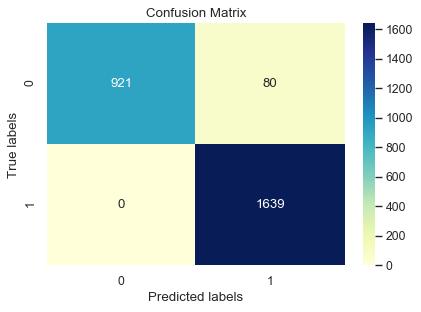

In [22]:
## Checking with xgboost
for i in range(0,6):
    df_smp = class_imbalance_no(df,minr=majl[i],maj=minrl[i],minor=0,col=['Bankrupt?'])
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    x = col_drop(df_smp,colum,typ=0)
    y = df_smp[colum]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'xgboost',task = 'Class',n=3)
    print("Majority class resampled: ",majl[i],"Minority class resampled: ",minrl[i])
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()

#### Best Combination 6000 majority class and 4000 minority class, in all cases Random forest performed well
#### Now checking for optimum no of features

No of Features  1
Precision:  94.85469271081467
Recall:  100.0
AUC score is:  0.9587471352177235
Accuracy on Test Data is:  96.72727272727273 %


<Figure size 1080x576 with 0 Axes>

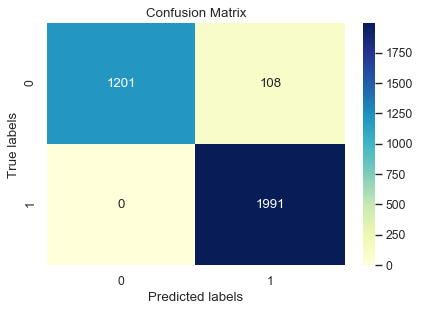


No of Features  2
Precision:  95.3544061302682
Recall:  100.0
AUC score is:  0.9629488158899924
Accuracy on Test Data is:  97.06060606060606 %


<Figure size 1080x576 with 0 Axes>

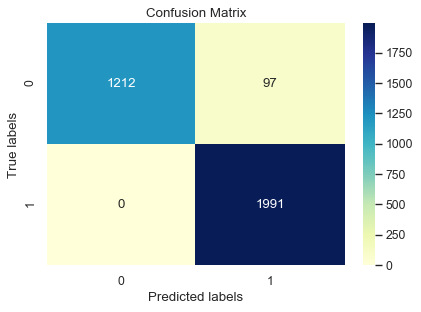


No of Features  3
Precision:  96.36979670861568
Recall:  100.0
AUC score is:  0.9713521772345302
Accuracy on Test Data is:  97.72727272727273 %


<Figure size 1080x576 with 0 Axes>

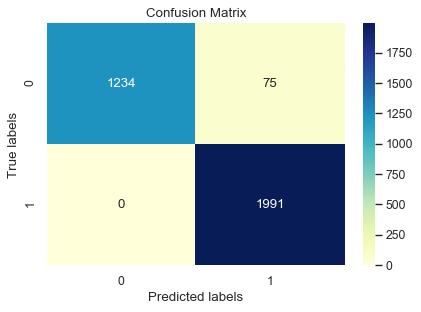


No of Features  4
Precision:  96.60359049005336
Recall:  100.0
AUC score is:  0.9732620320855615
Accuracy on Test Data is:  97.87878787878788 %


<Figure size 1080x576 with 0 Axes>

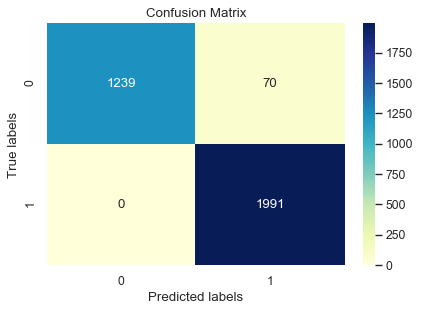


No of Features  5
Precision:  96.13713182037664
Recall:  100.0
AUC score is:  0.9694423223834989
Accuracy on Test Data is:  97.57575757575758 %


<Figure size 1080x576 with 0 Axes>

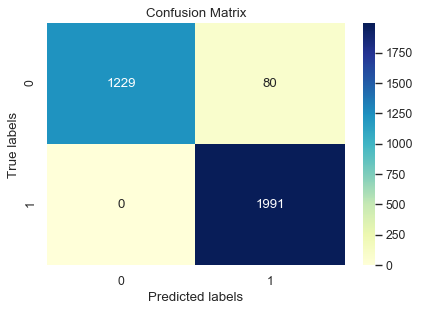


No of Features  6
Precision:  97.02729044834308
Recall:  100.0
AUC score is:  0.9766997708174179
Accuracy on Test Data is:  98.15151515151516 %


<Figure size 1080x576 with 0 Axes>

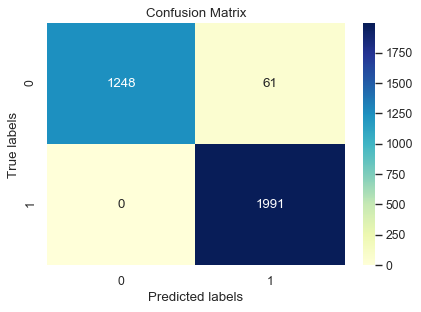


No of Features  7
Precision:  96.55674102812803
Recall:  100.0
AUC score is:  0.9728800611153553
Accuracy on Test Data is:  97.84848484848484 %


<Figure size 1080x576 with 0 Axes>

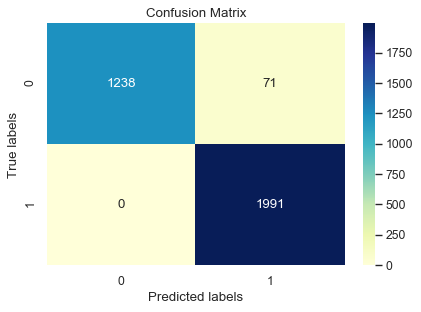


No of Features  8
Precision:  96.8385214007782
Recall:  100.0
AUC score is:  0.9751718869365928
Accuracy on Test Data is:  98.03030303030303 %


<Figure size 1080x576 with 0 Axes>

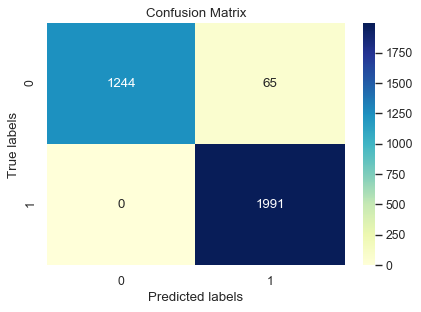


No of Features  9
Precision:  96.7444120505345
Recall:  100.0
AUC score is:  0.9744079449961802
Accuracy on Test Data is:  97.96969696969697 %


<Figure size 1080x576 with 0 Axes>

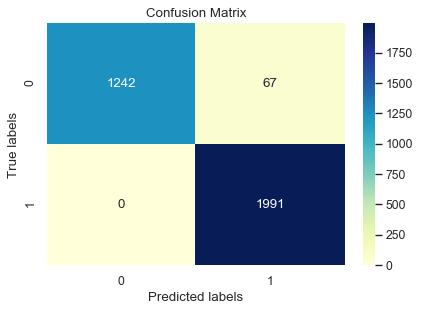

In [29]:
## Changing Class balance and checking resuts
all_algo = ['knn','naive','logit','mlp','svc', 'decisiontree','randomforest','xgboost','adaboost','gboost']
colum = ['Bankrupt?']
df_smp = class_imbalance_no(df,minr=6000,maj=4000,minor=0,col=['Bankrupt?'])
for i in range(1,10):
    x,y,fs = feature_selectk(df_smp,f_s=i,col=colum)
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
    print("No of Features ", i)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()

Text(0, 0.5, 'Accuracy')

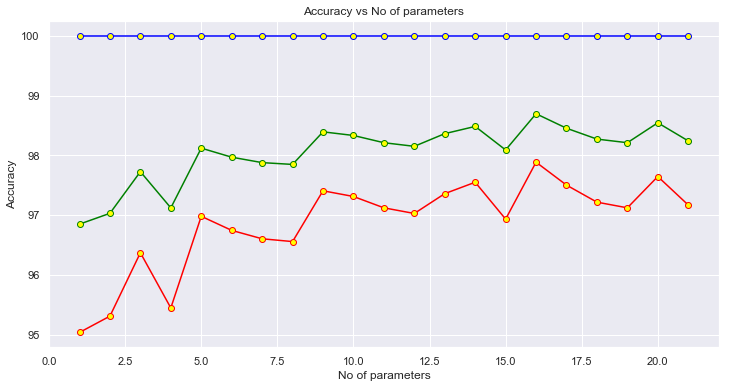

In [32]:
# Ploting graph to get optimum no of features.
accu = []
preu = []
recallu = []
# Calculating accuracy by selecting  1 to 22 no of parameters
for i in range(1, 22):
    x,y,fs = feature_selectk(df_smp,f_s=i,col=colum)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
    acc = acc*100
    accu.append(acc)
    preu.append(pre)
    recallu.append(recall)
# Ploting K elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 22), accu, color='green', markerfacecolor='yellow', marker='o')
plt.plot(range(1, 22), preu, color='red', markerfacecolor='yellow', marker='o')
plt.plot(range(1, 22), recallu, color='blue', markerfacecolor='yellow', marker='o')
plt.title('Accuracy vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('Accuracy')

### From the above graph of Accuracy, Precision and Recall over number of feature the optimum no is 9

Text(0, 0.5, 'Accuracy')

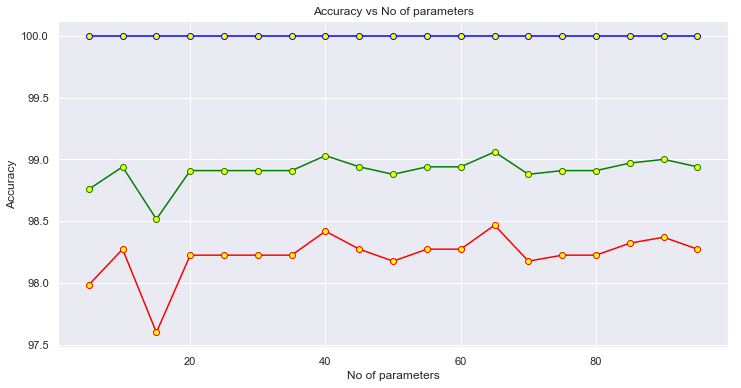

In [34]:
# Ploting graph to get optimum no of features.
accu = []
preu = []
recallu = []
x = col_drop(df_smp,colum,typ=0)
y = df_smp[colum]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# Calculating accuracy by selecting  1 to 22 no of parameters
for i in range(5, 100,5):
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=i)
    acc = acc*100
    accu.append(acc)
    preu.append(pre)
    recallu.append(recall)
# Ploting K elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(5, 100,5), accu, color='green', markerfacecolor='yellow', marker='o')
plt.plot(range(5, 100,5), preu, color='red', markerfacecolor='yellow', marker='o')
plt.plot(range(5, 100,5), recallu, color='blue', markerfacecolor='yellow', marker='o')
plt.title('Accuracy vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('Accuracy')

### From the above graph of Accuracy, Precision and Recall over no of trees  the optimum no is 65

Precision:  98.22397631968425
Recall:  100.0
AUC score is:  0.9862490450725745
Accuracy on Test Data is:  98.9090909090909 %


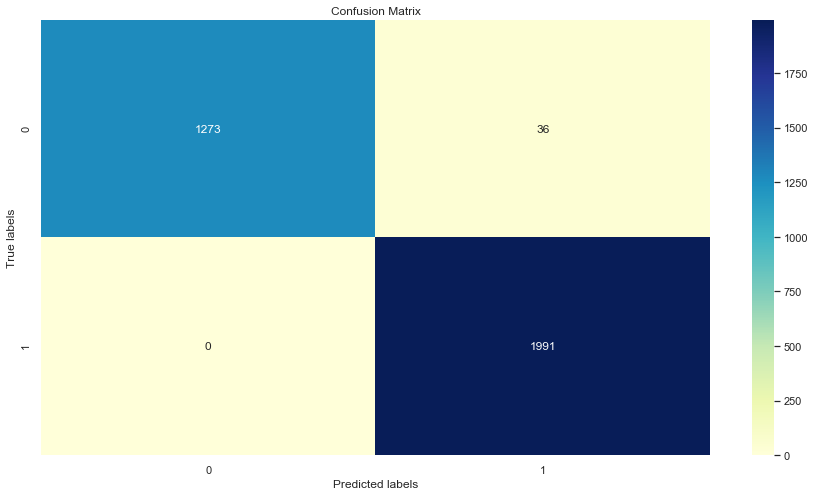

In [36]:
### Results after fine tuning
df_smp = class_imbalance_no(df,minr=6000,maj=4000,minor=0,col=['Bankrupt?'])
x,y,fs = feature_selectk(df_smp,f_s=9,col=colum)
cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=65)
print("Precision: ",pre)
print("Recall: ",recall)
print("AUC score is: ",auc)
print("Accuracy on Test Data is: ",acc*100,"%")
con_mat(cm,['0','1'])

### After fine tuing results increased significalty as visible above